In [9]:
import math as m
from mcnets import *
import numpy as np
from matplotlib import pyplot as plt

In [10]:
# Test data for f(x) = x^2
xt = [*range(1, 101)]
yt = [m.sin(x/30) for x in xt]

# Slope method
def getM(NN, xt, y0=np.inf):
    # Handling if starting point is given
    if y0 != np.inf:
        points = [y0]
        xt = xt[:-1]
    else:
        points = []

    # Get slope values and apply to points
    for i, x in enumerate(xt):
        if i == 0 and y0 == np.inf:
            points.append(NN.Calculate(x, hiddenFunction="ELU"))
        else:
            newPoint = points[-1] + NN.Calculate(x, hiddenFunction="ELU")
            points.append(newPoint)
    return np.array(points).reshape(len(points), 1)

# Array formating
xt = np.array(xt).reshape(len(xt), 1)
yt = np.array(yt).reshape(len(yt), 1)

In [11]:
# Make initial net
net = AdvNet(1, [12]*3, 1)
print(net)

# Initial Predictions
pts = getM(net, xt, yt[0])
SSE = np.sum((yt - getM(net, xt, yt[0]))**2)

              Neural Net Characteristics:               
            Layer Sizes = [1, 12, 12, 12, 1]            
      Weight Medians = [-0.14, 0.04, -0.01, 0.03]       
                  # of Parameters: 312                  


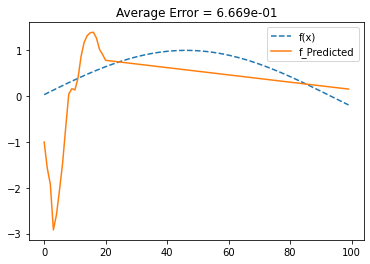

In [4]:
# Train to the slope data
y0 = yt[0]
for cycle in range(3):
    # Loop for weight selection
    # for wts in ['gates', 'middle']:

    # Iterative training loop
    for i in range(1, 1000+1):
        # Tweak net and get new predictions
        testNet = net.CopyNet()
        testNet.TweakWeights(0.8/i)
        pts = getM(testNet, xt)
        
        # Check error
        err = np.sum((yt - pts)**2)
        if err < SSE:
            SSE = err
            net = testNet.CopyNet()

# Update Predictions
pts = getM(net, xt)
avgError = format((SSE/len(xt))**0.5, ".3e")
plt.plot(yt, '--')
plt.plot(pts)
plt.title(f"Average Error = {avgError}")
plt.legend(["f(x)", "f_Predicted"])

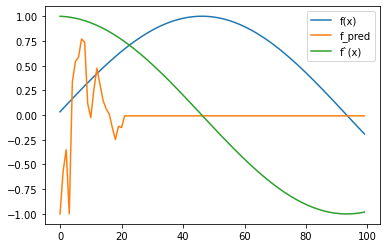

In [5]:
# Plot with defualt output-to-point method
# In this case, gives the derivative of the fitted graph
prds = Forecast(net, xt, yt, plotResults=False, hiddenFunc="ELU")

plt.plot(yt)
plt.plot(prds)
Dx = [m.cos(x/30) for x in [*range(1, 101)]]
plt.plot(Dx)
plt.legend(["f(x)", "f_pred", "f`(x)"])